In [229]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
import random
import re

In [230]:
data = pd.read_csv('menu.csv')

In [231]:
print(data['Serving Size'])

0       4.8 oz (136 g)
1       4.8 oz (135 g)
2       3.9 oz (111 g)
3       5.7 oz (161 g)
4       5.7 oz (161 g)
            ...       
255    10.1 oz (285 g)
256    13.4 oz (381 g)
257     6.7 oz (190 g)
258    14.2 oz (403 g)
259     7.1 oz (202 g)
Name: Serving Size, Length: 260, dtype: object


Nie powinny wchodzić w skład wektora cech:
* category (z nimi będziemy porównywać)
* item (nazwy nie da się interpretować)
* serving size (różne jednostki - gramatura, objętość)

In [232]:
data.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [233]:
data['Serving Size'].describe()

count              260
unique             107
top       16 fl oz cup
freq                45
Name: Serving Size, dtype: object

In [234]:
data = data.drop(columns=['Category', 'Item', 'Serving Size'])

In [235]:
data_np = data.to_numpy()

In [236]:
print(data_np)

[[300. 120.  13. ...   0.  25.  15.]
 [250.  70.   8. ...   0.  25.   8.]
 [370. 200.  23. ...   0.  25.  10.]
 ...
 [340. 100.  11. ...   0.  25.   6.]
 [810. 290.  32. ...   0.  60.   6.]
 [410. 150.  16. ...   0.  30.   4.]]


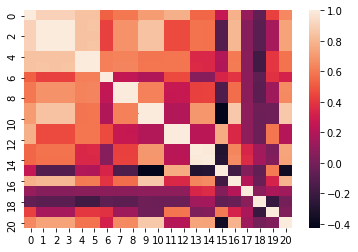

In [237]:
corr = np.corrcoef(data_np, rowvar=False)
corr_map = sb.heatmap(corr).figure.savefig('corr_map')

Wycentrowanie nie jest konieczne, jednak ułatwi skalowanie.

In [238]:
data['Calories'].describe()

count     260.000000
mean      368.269231
std       240.269886
min         0.000000
25%       210.000000
50%       340.000000
75%       500.000000
max      1880.000000
Name: Calories, dtype: float64

In [239]:
data['Sugars'].describe()

count    260.000000
mean      29.423077
std       28.679797
min        0.000000
25%        5.750000
50%       17.500000
75%       48.000000
max      128.000000
Name: Sugars, dtype: float64

In [240]:
data['Protein'].describe()

count    260.000000
mean      13.338462
std       11.426146
min        0.000000
25%        4.000000
50%       12.000000
75%       19.000000
max       87.000000
Name: Protein, dtype: float64

In [241]:
data['Trans Fat'].describe()

count    260.000000
mean       0.203846
std        0.429133
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.500000
Name: Trans Fat, dtype: float64

In [242]:
print(data.shape[1])


21


In [243]:
data_reduced = data.drop(columns=['Total Fat', 'Saturated Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber'])
# data_reduced = data.drop(columns=['Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)', 'Cholesterol (% Daily Value)', 'Sodium (% Daily Value)', 'Carbohydrates (% Daily Value)', 'Dietary Fiber (% Daily Value)'])

In [244]:
data_reduced_np = data_reduced.to_numpy()

<AxesSubplot:>

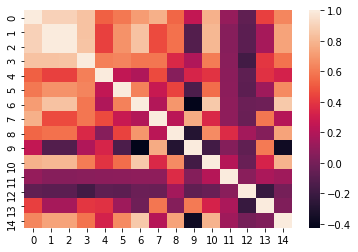

In [245]:
sb.heatmap(np.corrcoef(data_reduced_np, rowvar=False))

In [246]:
final_data = data_reduced.drop(columns=['Calories from Fat'])
final_data.describe().round(2)

,Calories,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Trans Fat,Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.00,260.00,260.00,260.00,260.00,260.00,260.00,260.00,260.00,260.00,260.00,260.00,260.00,260.00
mean,368.27,21.82,29.97,0.20,18.39,20.68,15.78,6.53,29.42,13.34,13.43,8.53,20.97,7.73
std,240.27,21.89,26.64,0.43,29.09,24.03,9.42,6.31,28.68,11.43,24.37,26.35,17.02,8.72
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,210.00,3.75,4.75,0.00,2.00,4.75,10.00,0.00,5.75,4.00,2.00,0.00,6.00,0.00
50%,340.00,17.00,24.00,0.00,11.00,8.00,15.00,5.00,17.50,12.00,8.00,0.00,20.00,4.00
75%,500.00,35.00,48.00,0.00,21.25,36.25,20.00,10.00,48.00,19.00,15.00,4.00,30.00,15.00
max,1880.00,182.00,102.00,2.50,192.00,150.00,47.00,28.00,128.00,87.00,170.00,240.00,70.00,40.00


In [247]:
data = pd.read_csv('menu.csv')
data['Serving Size'] = data['Serving Size'].apply(lambda x : float(x.split(' ')[0]))
data['Serving Size'].describe()
print(data['Serving Size'])

0       4.8
1       4.8
2       3.9
3       5.7
4       5.7
       ... 
255    10.1
256    13.4
257     6.7
258    14.2
259     7.1
Name: Serving Size, Length: 260, dtype: float64


In [248]:
# for c in ['Trans Fat', 'Sugars', 'Protein']:
#     final_data[c] = final_data[c] / data['Serving Size']
    
for c in final_data:
    final_data[c] = final_data[c] / data['Serving Size']
    
for c in ['Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)', 'Cholesterol (% Daily Value)', 'Sodium (% Daily Value)', 'Carbohydrates (% Daily Value)', 'Dietary Fiber (% Daily Value)', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']:
    final_data[c] = final_data[c] / 100

c = 'Calories'
final_data[c] = final_data[c] / 2500

In [249]:
final_data.describe().round(2)

,Calories,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Trans Fat,Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.00,260.00,260.00,260.00,260.00,260.00,260.00,260.00,260.00,260.00,260.00,260.00,260.00,260.00
mean,0.02,0.03,0.03,0.02,0.02,0.03,0.02,0.01,2.38,1.58,0.01,0.01,0.02,0.01
std,0.01,0.03,0.03,0.05,0.04,0.03,0.01,0.01,2.53,1.56,0.03,0.09,0.03,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.74,0.52,0.00,0.00,0.01,0.00
50%,0.01,0.02,0.03,0.00,0.01,0.01,0.01,0.00,1.61,0.83,0.01,0.00,0.02,0.00
75%,0.03,0.05,0.05,0.00,0.02,0.06,0.02,0.01,3.17,2.91,0.01,0.01,0.03,0.02
max,0.06,0.12,0.19,0.25,0.19,0.11,0.08,0.06,22.00,9.00,0.22,1.33,0.30,0.08


In [250]:
# for col in final_data:
#     final_data[col] = final_data[col].apply(lambda x: x if x == 0 else np.log(x))
# final_data.describe().round(2)

In [251]:
# final_data = final_data - final_data.mean()
# final_data.describe().round(2)

In [252]:
# final_data = final_data / final_data.std()
# final_data.describe().round(2)

<AxesSubplot:>

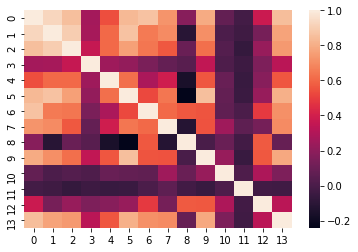

In [253]:
sb.heatmap(np.corrcoef(final_data.to_numpy(), rowvar=False))

In [254]:
final_data_np = final_data.to_numpy()

In [255]:
def score_basic_kmeans(data, func, verbose=False, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, init=func, verbose=verbose)
    kmeans.fit(data)
    return davies_bouldin_score(data, kmeans.labels_)

In [256]:
score_basic_kmeans(final_data_np, "k-means++")

0.5313922502050332

In [257]:
score_basic_kmeans(final_data_np, "random")

0.5313922502050332

In [258]:
def get_random(X, n_clusters, random_state):
    X = np.array(X)
    res = [[random.uniform(min(list(X[:, i])), max(list(X[:, i]))) for j in range(n_clusters)] for i in range(X.shape[1])]
    return np.stack(res, axis=1)

In [259]:
score_basic_kmeans(final_data_np, get_random)

0.5283876125181701

In [260]:
NUM_ATTEMPTS = 5
NUM_CLUSTERS = 5
NUM_ITER = 50

def assess_method(data_sample, method):
    scores = []

    for sample in range(NUM_ATTEMPTS):
        print('\nCentroid attempt: ', sample)
        km = KMeans(n_clusters=NUM_CLUSTERS, init=method, max_iter=1, n_init=1)#, verbose=1)
        km.fit(data_sample)
        scores.append([])
        cents = km.cluster_centers_

        for iter in range(NUM_ITER):
            km = KMeans(n_clusters=NUM_CLUSTERS, init=cents, max_iter=1, n_init=1)
            km.fit(data_sample)
            scores[sample].append(davies_bouldin_score(data_sample, km.labels_))
            cents = km.cluster_centers_
    return np.array(scores)

In [261]:
def plot_assessment(assessment, xlabel="iteration", ylabel="davies_bouldin_score"):
    assessment = assessment.T
    stds = [np.std(res) for res in assessment]
    means = [np.mean(res) for res in assessment]
    plt.figure(figsize=(10, 6))
    plt.bar(range(assessment.shape[0]), means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=3)
    # plt.xticks(range(assessment.shape[1]))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(f'method_assessment_{xlabel}')
    return means[-1], stds[-1]


Centroid attempt:  0

Centroid attempt:  1

Centroid attempt:  2

Centroid attempt:  3

Centroid attempt:  4
(0.7075909103123852, 0.14387499685560937)


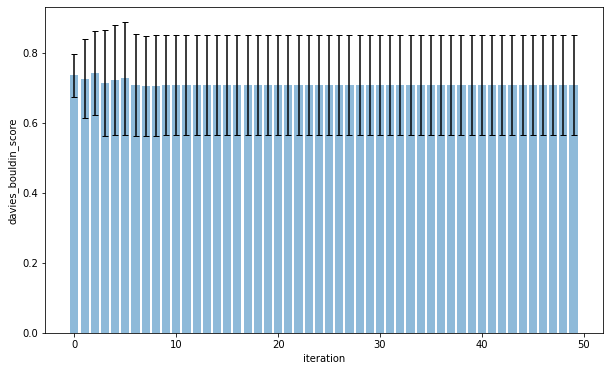

In [262]:
assessment = assess_method(final_data, "random")
print(plot_assessment(assessment))


Centroid attempt:  0

Centroid attempt:  1

Centroid attempt:  2

Centroid attempt:  3

Centroid attempt:  4
(0.49129399794730466, 0.04157391199276761)


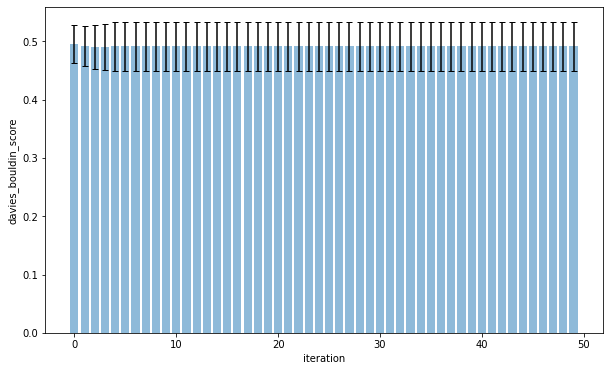

In [263]:
assessment = assess_method(final_data, "k-means++")
print(plot_assessment(assessment))


Centroid attempt:  0

Centroid attempt:  1

Centroid attempt:  2

Centroid attempt:  3

Centroid attempt:  4
(0.5104340815756772, 0.038318625946459586)


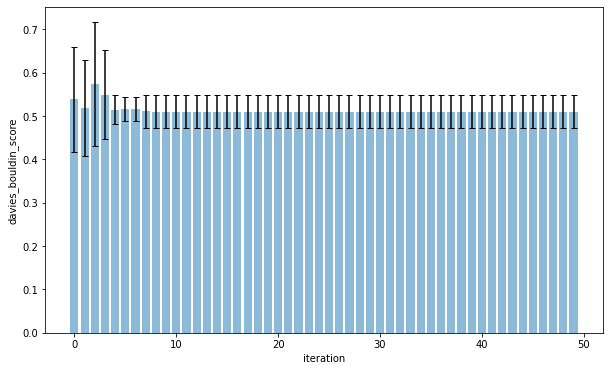

In [264]:
assessment = assess_method(final_data, get_random)
print(plot_assessment(assessment))

In [265]:
best_method = get_random
def assess_k(data, ns_clusters, repetitions):
    k_scores = []
    for k in range(len(ns_clusters)):
        k_scores.append([])
        for i in range(repetitions):
            kmeans = KMeans(n_clusters=ns_clusters[k], init=best_method)
            kmeans.fit(data)
            k_scores[k].append(davies_bouldin_score(data, kmeans.labels_))
        k_scores[k] = np.array(k_scores[k])
    return np.array(k_scores)

In [266]:
k_range = range(3, 21)
k_assessment = assess_k(final_data, k_range, 30)

In [267]:
def plot_k_assessment(assessment, k_range):
    stds = [np.std(res) for res in assessment]
    means = [np.mean(res) for res in assessment]
    plt.bar(k_range, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=3)
    plt.xticks(k_range)
    plt.xlabel("k")
    plt.ylabel("davies_bouldin_score")
    plt.savefig(f'k_assessment_{k_range}')

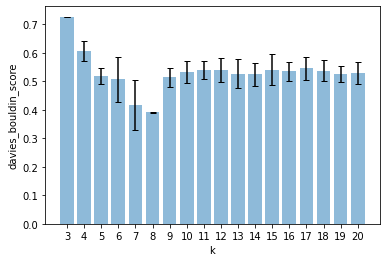

In [268]:
plot_k_assessment(k_assessment, k_range)

In [269]:
means = [np.mean(res) for res in k_assessment]
stds = [np.std(res) for res in k_assessment]
lower = [means[i] - stds[i] for i in range(len(means))]
print(k_range[lower.index(min(lower))])

7


In [270]:
def get_res(data, method, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init=method, n_init=1)
    kmeans.fit(data)
    return kmeans.labels_, kmeans.cluster_centers_

In [271]:
BEST_K = 7

In [272]:
data = pd.read_csv('menu.csv')

distinct_categories = list(set(data['Category']))
COLOR_NUM = max(BEST_K, len(distinct_categories))
colors = []

for i in range(COLOR_NUM):
    colors.append('#%06X' % random.randint(0, 0xFFFFFF))

In [273]:
labels, centers = get_res(final_data_np, best_method, BEST_K)
label_colors = [colors[label] for label in labels]

In [274]:
np.round(centers, 2)

array([[5.00e-02, 0.00e+00, 0.00e+00, 0.00e+00, 2.00e-02, 6.00e-02,
        8.00e-02, 2.00e-02, 2.20e+01, 9.00e+00, 1.00e-01, 0.00e+00,
        3.00e-01, 8.00e-02],
       [1.00e-02, 1.00e-02, 1.00e-02, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e-02, 1.00e-02, 6.10e-01, 3.20e-01, 1.00e-02, 1.00e-02,
        1.00e-02, 0.00e+00],
       [3.00e-02, 6.00e-02, 6.00e-02, 4.00e-02, 5.00e-02, 7.00e-02,
        2.00e-02, 2.00e-02, 9.40e-01, 3.37e+00, 2.00e-02, 1.00e-02,
        2.00e-02, 2.00e-02],
       [2.00e-02, 3.00e-02, 5.00e-02, 4.00e-02, 1.00e-02, 1.00e-02,
        3.00e-02, 1.00e-02, 6.28e+00, 1.00e+00, 1.00e-02, 0.00e+00,
        3.00e-02, 1.00e-02],
       [1.00e-02, 1.00e-02, 1.00e-02, 1.00e-02, 0.00e+00, 0.00e+00,
        1.00e-02, 0.00e+00, 3.05e+00, 5.50e-01, 1.00e-02, 3.00e-02,
        2.00e-02, 0.00e+00],
       [4.00e-02, 4.00e-02, 8.00e-02, 0.00e+00, 3.00e-02, 5.00e-02,
        4.00e-02, 0.00e+00, 1.20e+01, 8.00e+00, 1.00e-01, 4.00e-02,
        3.00e-01, 0.00e+00],
       [6.

In [275]:
print(len(centers))
np.round(centers,2)

7


array([[5.00e-02, 0.00e+00, 0.00e+00, 0.00e+00, 2.00e-02, 6.00e-02,
        8.00e-02, 2.00e-02, 2.20e+01, 9.00e+00, 1.00e-01, 0.00e+00,
        3.00e-01, 8.00e-02],
       [1.00e-02, 1.00e-02, 1.00e-02, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e-02, 1.00e-02, 6.10e-01, 3.20e-01, 1.00e-02, 1.00e-02,
        1.00e-02, 0.00e+00],
       [3.00e-02, 6.00e-02, 6.00e-02, 4.00e-02, 5.00e-02, 7.00e-02,
        2.00e-02, 2.00e-02, 9.40e-01, 3.37e+00, 2.00e-02, 1.00e-02,
        2.00e-02, 2.00e-02],
       [2.00e-02, 3.00e-02, 5.00e-02, 4.00e-02, 1.00e-02, 1.00e-02,
        3.00e-02, 1.00e-02, 6.28e+00, 1.00e+00, 1.00e-02, 0.00e+00,
        3.00e-02, 1.00e-02],
       [1.00e-02, 1.00e-02, 1.00e-02, 1.00e-02, 0.00e+00, 0.00e+00,
        1.00e-02, 0.00e+00, 3.05e+00, 5.50e-01, 1.00e-02, 3.00e-02,
        2.00e-02, 0.00e+00],
       [4.00e-02, 4.00e-02, 8.00e-02, 0.00e+00, 3.00e-02, 5.00e-02,
        4.00e-02, 0.00e+00, 1.20e+01, 8.00e+00, 1.00e-01, 4.00e-02,
        3.00e-01, 0.00e+00],
       [6.

In [276]:
print(labels)
unique, counts = np.unique(labels, return_counts=True)
print(counts)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2
 2 1 3 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 1 1 1 1 1 4 4 3 6 6 3 3 3 3 4
 4 4 4 1 1 1 1 4 4 4 4 1 1 1 1 4 4 4 4 5 0 4 4 4 4 1 1 1 1 1 4 4 1 4 1 1 1
 1 1 1 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 1 1 1 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4
 4 3 4 4 3 4 4 3 3 4 4 4 4 4 4 4 4 4 4 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3]
[ 1 52 88 28 88  1  2]


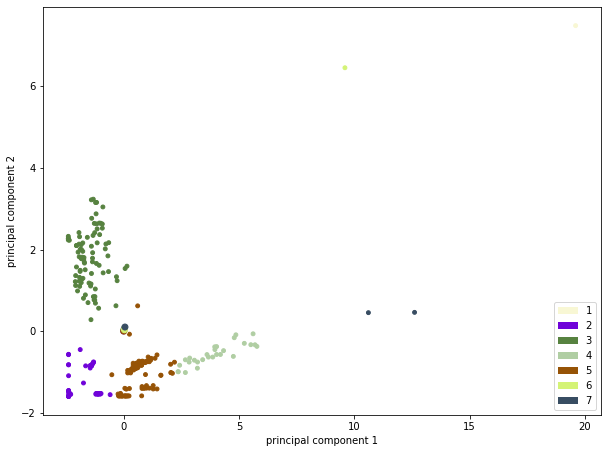

In [277]:
pca = PCA(n_components=2)
pca.fit(final_data_np)
transformed_data = pca.transform(final_data_np)
transformed_centers = pca.transform(centers)
fig=plt.figure(figsize=(10, 7.5))
plt.scatter(transformed_data[:,0], transformed_data[:, 1], c=label_colors, s=15)
plt.scatter(centers[:,0], centers[:, 1], c=colors[:BEST_K])

recs = []
for i in range(BEST_K):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))

plt.legend(recs, range(1, BEST_K + 1), loc='lower right')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.savefig('cluters_pca')

In [278]:
category_colors = [colors[distinct_categories.index(category)] for category in data['Category']]

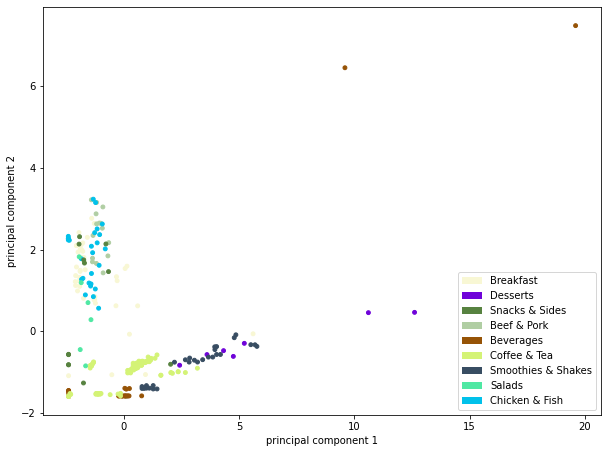

In [279]:
fig=plt.figure(figsize=(10, 7.5))
plt.scatter(transformed_data[:,0], transformed_data[:, 1], c=category_colors, s=15)
recs = []
for i in range(len(distinct_categories)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs, distinct_categories, loc='lower right')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.savefig('categories')